https://github.com/42tabares/TallerMetodos/blob/main/Asignaciones/Laboratorios/Laboratorio07_Derivada_integracion_01.ipynb

# Laboratorio 07
## Derivates and integrals

### 0) warm-up point

In [73]:
import sympy as sp
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy import optimize
from scipy import integrate
from sympy import init_printing

init_printing()

x = sp.symbols("x")
f = lambda x: (x**2) * (sp.exp(-sp.sin(x)**2))
g = lambda x: x**3

f(x)

In [22]:
fp = sp.diff(f(x),x,1)
fp

In [23]:
#Builds lambda functions from 
f_ = sp.lambdify(x,f(x),"numpy")
fp_ = sp.lambdify(x, fp, "numpy")

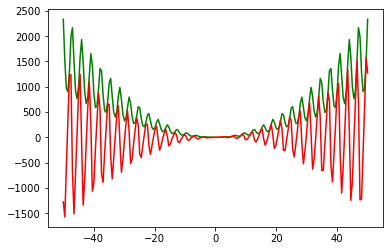

In [24]:
xAxis = np.linspace(-50,50,200)

plt.plot(xAxis,f_(xAxis), color='green')
plt.plot(xAxis,fp_(xAxis), color='red')

### 1) RLC Circuit

In [25]:
import pandas as pd
from scipy.interpolate import lagrange

In [26]:
##Dataframe

t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
I = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

df = pd.DataFrame({"time":t,"current":I})
df

,time,current
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


interpolation lagrange polynomial:
             4             3             2
-8.333e+04 x + 3.417e+05 x - 5.252e+05 x + 3.587e+05 x - 9.186e+04


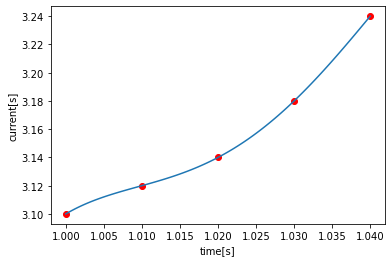

In [27]:
polyLagrange = lagrange(t,I)

for i in range(0,len(I)):
    plt.plot(t[i],I[i],"ro")

xAxis= np.linspace(1.,1.04,100)
plt.plot(xAxis,polyLagrange(xAxis))
plt.xlabel("time[s]")
plt.ylabel("current[s]");
print("interpolation lagrange polynomial:\n", polyLagrange)

In [28]:
dIdt = np.polyder(polyLagrange)
print("The derivative of the interpolate is:\n",dIdt)

The derivative of the interpolate is:
             3             2
-3.333e+05 x + 1.025e+06 x - 1.05e+06 x + 3.587e+05


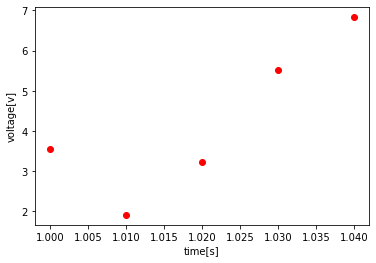

In [29]:
L = 0.98 #herios
R = 0.142 #ohms

def e(t,i):
    return L*dIdt(t) + R*i

for i in range(0,len(t)):
    volt = e(t[i],I[i])
    plt.plot(t[i],volt,"ro")

plt.xlabel("time[s]")
plt.ylabel("voltage[v]");

## Integrals

### **Markdown excercises:**

#### Trapezoid:

For a function f(x) and an integral defined between [a,b] 

$$\int_{a}^{b}f(x)dx = \frac{h}{2}[ f(a) + f(b) ]-\frac{h^3}{12}f^{''}(\xi)$$

where $\xi \in [a, b]$ and $h = a-b$.

#### Simpson:

For a function f(x) and an integral defined between [a,c] with b ϵ [a,c] we can write te following lagrange polynomial for the function f(x):

$$P_2(x) = \frac{(x-b)(x-c)}{(a-b)(a-c)}f(a) + \frac{(x-a)(x-c)}{(b-a)(b-c)}f(b) + \frac{(x-a)(x-b)}{(c-a)(c-b)}f(c)$$ 
 
We can use it to get an approximate intewgrate of our function:
 
$$\int_{a}^{c} f(x)dx = \frac{h}{3}[ f(a)+4f(b)+f(c) ]-\frac{h^5}{90}f^{(4)}(\xi)$$

#### Quadrature:



## Integration of functions:

The following function will do all 3 integration methods, print the results and do a graph within the area of integration of the function

In [132]:
def integration_methods(func,a,b):
    xAxis = np.linspace(a,b)
    yAxis = [func(x) for x in xAxis]

    print("By Quadrature:", integrate.quad(func,a,b)[0])
    print("By Trapezoid:", integrate.trapz(y=yAxis,x=xAxis))
    print("By Simpson:", integrate.simps(y=yAxis,x=xAxis))
    plt.plot(xAxis,yAxis)


### $ \int_{0}^{\pi/2} \frac{1}{\sqrt{\tan{x}}},dx $

By Quadrature: 2.221441469079176
By Trapezoid: inf
By Simpson: inf


C:\Users\pegan\AppData\Local\Temp\ipykernel_14420\190043724.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/np.sqrt(np.tan(x))


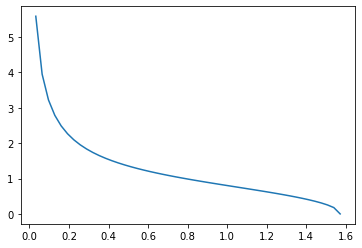

In [133]:
def f1(x):
    return 1/np.sqrt(np.tan(x))    

integration_methods(f1,0,np.pi/2)

By Quadrature: 3.1415726535898236
By Trapezoid: 0.0023980470493706555
By Simpson: 0.0023980529621024285


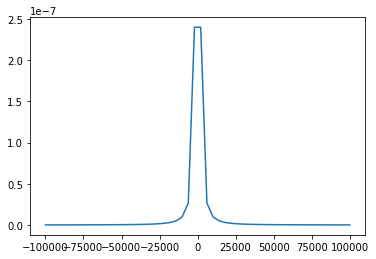

In [136]:
def f2(x):
    return 1/(1 + x**2)   

#We use high values instead of np.inf, doing so will throw errors.
integration_methods(f2,-100000,100000)

## Eliptic Integrals

### 6) Current loop 

In [77]:
# k squared
def k2(θ,r,a):
    return ((4*a*r*np.sin(θ))/((a**2)+(r**2)+(2*a*r*np.sin(θ))))

# Helper function that returns the functions of E and K to integrate, saves redundant code
def f(θ,r,a,inv=False):
    
    if inv:
        def integrative(Φ):
            return 1/(1 - (k2(θ,r,a) * np.sin(Φ)**2))**0.5
    else:
        def integrative(Φ):
            return (1 - (k2(θ,r,a) * np.sin(Φ)**2))**0.5
    
    return integrative

def E(θ,r,a):
    return integrate.quad( f(θ,r,a) , 0 , np.pi/2)[0]

def K(θ,r,a):
    return integrate.quad( f(θ,r,a,inv=True) , 0 , np.pi/2)[0]


# Potential at a point (spherical coordinates) of a current loop with radius r, current I = 3
def A_ϕ(θ,r,a=1,I=3,permitivity=1):
    
    k_squared = k2(θ,r,a)
    
    term1 = (4*I*a) / np.sqrt(((a**2)+(r**2)+(2*a*r*np.sin(θ)))) 
    
    term2 = ((((2 - k_squared)*K(θ,r,a))-2*E(θ,r,a)) / k_squared)
    
    return permitivity*term1*term2


Now, onto the graphication of the numerals

C:\Users\pegan\AppData\Local\Temp\ipykernel_14420\1519208244.py:31: RuntimeWarning: invalid value encountered in double_scalars
  term2 = ((((2 - k_squared)*K(θ,r,a))-2*E(θ,r,a)) / k_squared)


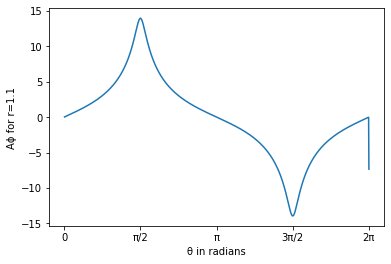

In [93]:
xAxis = np.linspace(0,2*np.pi,1000)
yAxis = [ A_ϕ(θ,r=1.1) for θ in xAxis ]
plt.plot(xAxis,yAxis)
plt.xlabel("θ in radians")
plt.xticks(np.arange(0,2*np.pi+0.1,np.pi/2),["0","π/2","π","3π/2","2π"])
plt.ylabel("Aϕ for r=1.1");

Text(0, 0.5, 'Aϕ for θ = π/3 ')

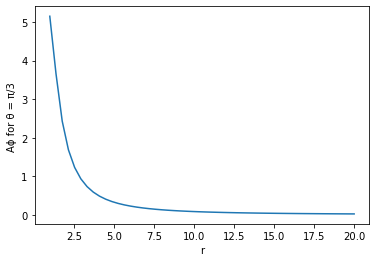

In [79]:
xAxis = np.linspace(1,20)
yAxis = [ A_ϕ(np.pi/3,r) for r in xAxis ]
plt.plot(xAxis,yAxis)
plt.xlabel("r")
plt.ylabel("Aϕ for θ = π/3 ")